# Time Series Analysis Life Expectancy

Contents:

01. Import Libraries
02. Import dataframe
03. Reset Index and create subset
04. Dicky-Fuller Stationarity Test
05. 1st Round Differencing
06. 2nd Round Differencing
07. Autocorrelation

# 01. Import Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # used for dicky-fuller test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # tool is used for autocorrelation
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from datetime import datetime # used to create datetime datatype from index

# 02. Import dataframe

In [42]:
# create path to folder
path = r"C:\Users\mngun\OneDrive\Desktop\Data Analysis\Data Immersion\Achievement 6\Life Expectancy"

In [45]:
# import dataframe
df_life= pd.read_pickle(os.path.join(path,'02_Data','Prepared Data','df_life_corr.pkl'))

In [46]:
# list columns in dataframe
df_life.columns.to_list()

['Country',
 'Year',
 'Continent',
 'Least Developed',
 'life_expect',
 'Population',
 'CO2_emiss',
 'health_spend',
 'Electric_consumption',
 'forest_area',
 'gdp_per_capita',
 'internet_usage',
 'military_spend',
 'open_defecation',
 'drinking_water_services',
 'adult_obesity',
 'beer_consumption',
 'Expected Age']

# 03.  Create subset and Reset Index

In [77]:
# creating new subset with mean life expectancy per year
df_mean_life= pd.DataFrame(df_life.groupby('Year')['life_expect'].mean())

In [78]:
# create an index
df_sub= df_mean_life.reset_index()

In [79]:
df_sub.head()

,Year,life_expect
0,2000,68.436453
1,2001,68.712396
2,2002,68.938217
3,2003,69.194394
4,2004,69.565919


In [81]:
# turn year column to datetime dtype
df_sub['year'] = pd.to_datetime(df_sub['Year'], format='%Y') 
# set year column as index
df_sub = df_sub.set_index('year') 
df_sub.drop(['Year'], axis=1, inplace=True) 
df_sub.head()

,life_expect
year,
2000-01-01,68.436453
2001-01-01,68.712396
2002-01-01,68.938217
2003-01-01,69.194394
2004-01-01,69.565919


In [85]:
# decomposing line chart into its components
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

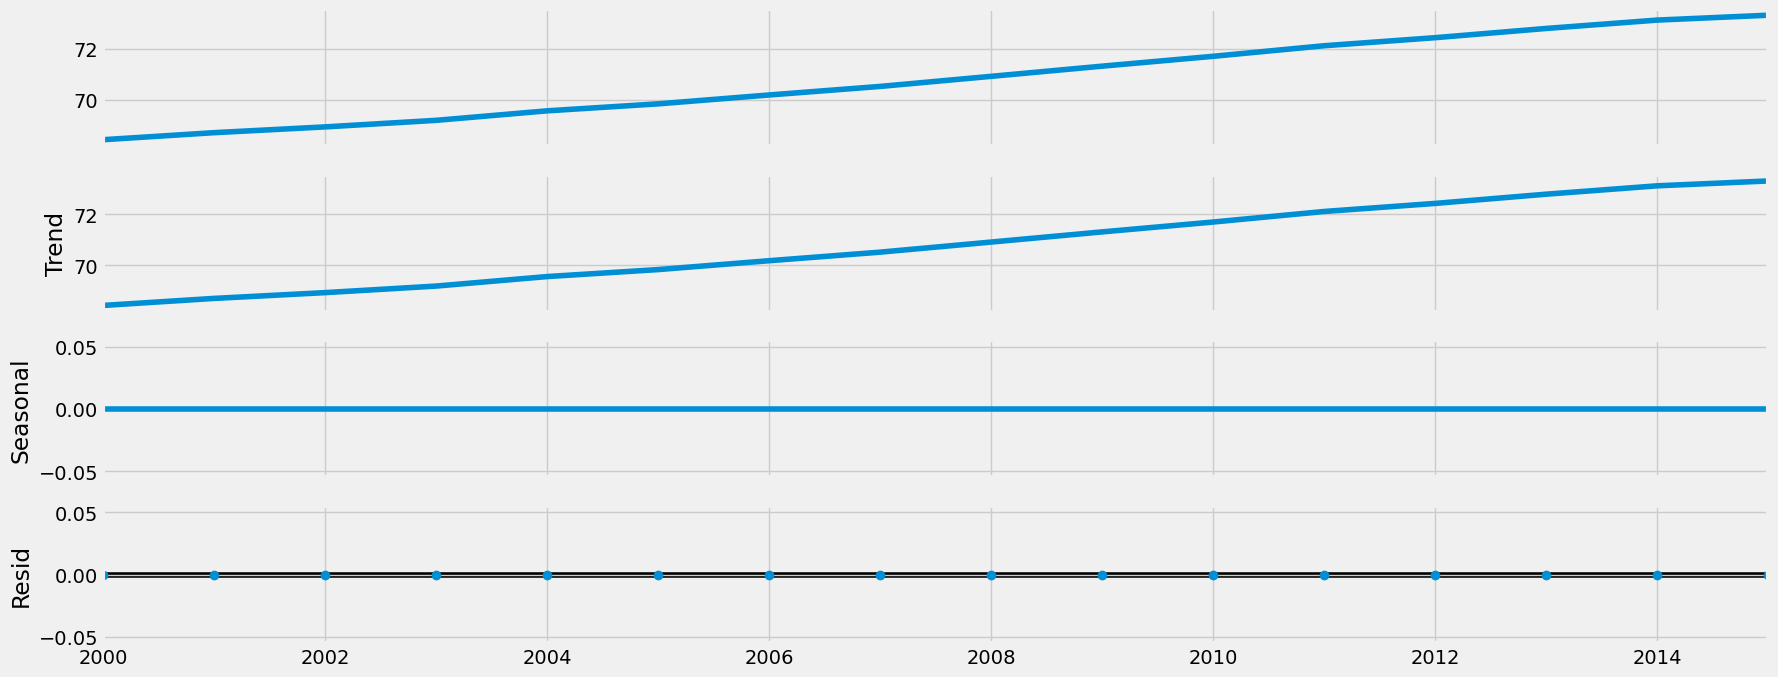

In [86]:
# plotting decomposition chart
decomposition.plot()
plt.show()

There are only yearly periods in this data set, which probably caused the lack of any seasonality component in the decomposition.The overall trend of the average life expectancies is positve. Life expectancies are on the steady rise. Therefore the chart does not exhibit stationarity but it is very smooth.

# 04. Dicky-Fuller Stationarity Test

In [87]:
# define the function
def dickey_fuller(timeseries): 
    # Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test on the time series with previously defined function
dickey_fuller(df_sub['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.480540
p-value                         0.120281
Number of Lags Used             5.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


Null hypothesis: The dataset is not statioanary
    
The Test statistic is greater than the Critical value at 1,5 or even 10%, and therefore we cannot reject the null hypothesis. The dataset is not stationary. This was to be expected after seeing the upward trend in the decomposition graph.

# 05. 1st round Differencing

In [88]:
# create new dataframe with differences
df_diff = df_sub - df_sub.shift(1)

In [89]:
# drop missing value
df_diff.dropna(inplace=True)

In [90]:
df_diff.head()

,life_expect
year,
2001-01-01,0.275943
2002-01-01,0.225821
2003-01-01,0.256177
2004-01-01,0.371525
2005-01-01,0.274032


In [91]:
def dickey_fuller(timeseries): 
    # Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test on the time series
dickey_fuller(df_diff['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.812171
p-value                         0.374436
Number of Lags Used             0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


After the first round of differencing the Test statistic is still greater than the critical values at even 10%. Terefore we cannot reject the null hypothesis and the data is not stationary.

# 06. 2nd round differencing

In [92]:
# create dataframe with differences
df_diff2= df_diff - df_diff.shift(1)

In [95]:
# drop missing values
df_diff2.dropna(inplace=True)

In [96]:
df_diff2.head()

,life_expect
year,
2002-01-01,-0.050122
2003-01-01,0.030356
2004-01-01,0.115348
2005-01-01,-0.097493
2006-01-01,0.072758


In [97]:
def dickey_fuller(timeseries): 
    # Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test on the time series
dickey_fuller(df_diff2['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.539501
p-value                         0.000167
Number of Lags Used             0.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


The Test statistic is now smaller than the critical value for 1%. This means we can reject the null hypothesis. The data is now stationary.

# 07. Auto Correlation

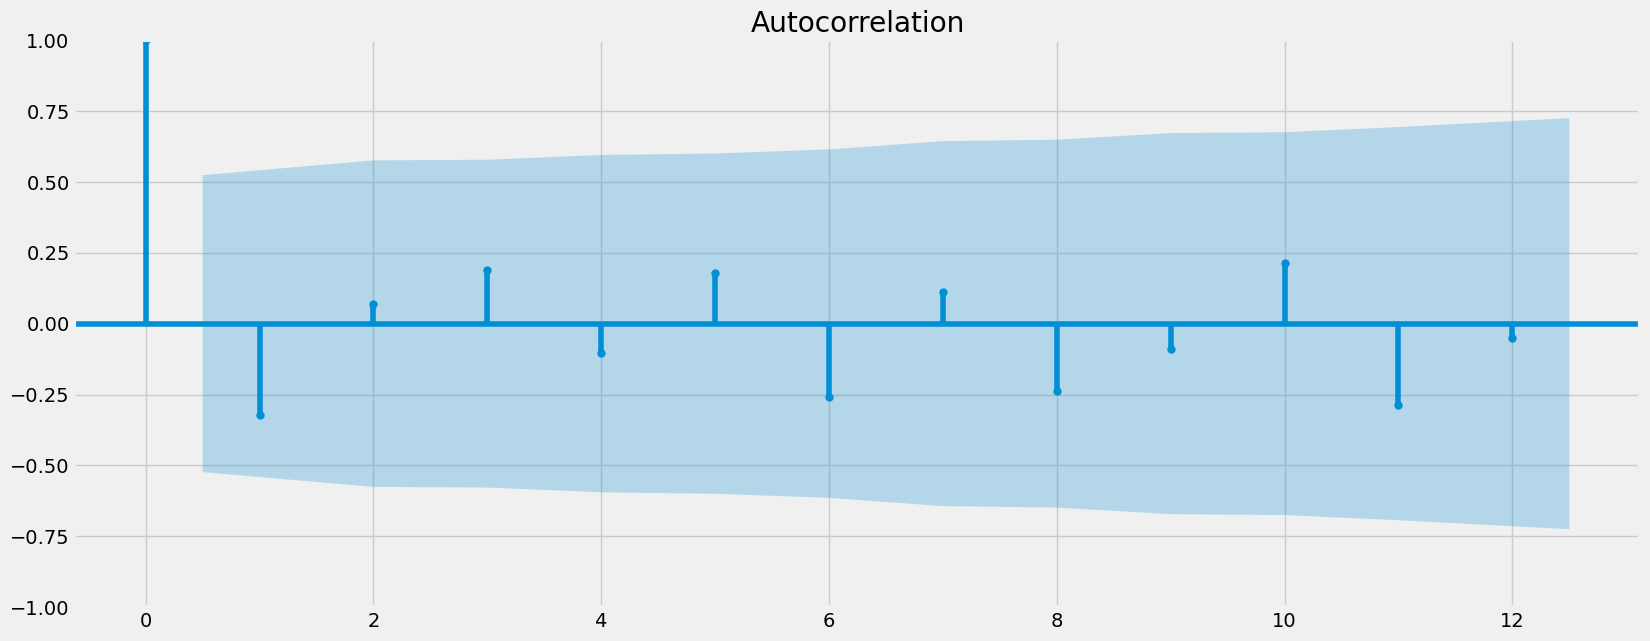

In [98]:
# plot autocorrelation of datapoints in time series
plot_acf(df_diff2)
plt.show()

This test shows autocorrelation within the data poinst. All the staffs except one are within the blue range. This means that the data has achieved stationarity. 